## Load Required Libraries.

In [ ]:
# !pip install mediapipe

## Import.

In [ ]:
import cv2
import matplotlib.pyplot as plt
from transformers import AutoImageProcessor, AutoModelForDepthEstimation
import torch
import numpy as np
from PIL import Image
import mediapipe as mp

## Function: Estimate Depth

In [ ]:
def process_depth_estimation(image_path):
    image = Image.open(image_path)
    image_processor = AutoImageProcessor.from_pretrained("LiheYoung/depth-anything-small-hf")
    model = AutoModelForDepthEstimation.from_pretrained("LiheYoung/depth-anything-small-hf")

    inputs = image_processor(images=image, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
        predicted_depth = outputs.predicted_depth

    ## interpolate to original size:
    prediction = torch.nn.functional.interpolate(
        predicted_depth.unsqueeze(1),
        size=image.size[::-1],
        mode="bicubic",
        align_corners=False,
    )

    output = prediction.squeeze().cpu().numpy()
    return output

## Function: Process pose positions.

In [ ]:
mp_pose = mp.solutions.pose
pose_util = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

def process_pose(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose_util.process(image_rgb)
    return results

## Function: Draw Landmarks.

In [ ]:
def draw_landmark(image, depth_image, results, scale = 1, thick = 3, size = 1):
    landmarks = results.pose_landmarks
    image_copy = image.copy()
    ## scale the height and width by scale.
    h, w, c = image.shape
    image_copy = cv2.resize(image_copy, (int(w * scale), int(h * scale)))
    h, w, c = image.shape
    if landmarks is None:
        return
    for connection in mp_pose.POSE_CONNECTIONS:
        start_idx = connection[0]
        end_idx = connection[1]
        start_landmark = landmarks.landmark[start_idx]
        end_landmark = landmarks.landmark[end_idx]

        # Get pixel coordinates
        start_point = (int(start_landmark.x * w), int(start_landmark.y * h))
        end_point = (int(end_landmark.x * w), int(end_landmark.y * h))

        ## Check within bounds.
        if start_point[0] < 0 or start_point[0] >= w or start_point[1] < 0 or start_point[1] >= h:
            continue

        if end_point[0] < 0 or end_point[0] >= w or end_point[1] < 0 or end_point[1] >= h:
            continue

        ## Get d1 and d2.
        # d1 = depth_image[start_point[1]][start_point[0]]
        # d2 = depth_image[end_point[1]][end_point[0]]
        # d_min = min(d1, d2)

        # Calculate the Euclidean distance
        length = np.sqrt((end_point[1] - start_point[1]) ** 2 + (end_point[0] - start_point[0]) ** 2)

        # Scale length to the real-world distance if depth is known, else leave as a relative value
        # length *= 100  # Example scaling factor (adjust as needed)

        # Scale start and end point.
        start_point = (int(start_point[0] * scale), int(start_point[1] * scale))
        end_point = (int(end_point[0] * scale), int(end_point[1] * scale))

        # Draw the connection
        cv2.line(image_copy, start_point, end_point, (0, 255, 0), 2)

        # Display the length
        mid_point = ((start_point[0] + end_point[0]) // 2, (start_point[1] + end_point[1]) // 2)
        cv2.putText(image_copy, f"{length:.2f}", mid_point, cv2.FONT_HERSHEY_SIMPLEX, size, (255, 255, 255), thick)

    mp_drawing = mp.solutions.drawing_utils
    mp_drawing.draw_landmarks(image_copy, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    return image_copy

In [ ]:
depth_image = process_depth_estimation("photo_0.jpg")
image = cv2.imread("photo_0.jpg", cv2.COLOR_BGR2RGB)
results = process_pose(image)
image_copy = draw_landmark(image, depth_image, results, size = 0.4, thick = 2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/437 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/954 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/99.2M [00:00<?, ?B/s]

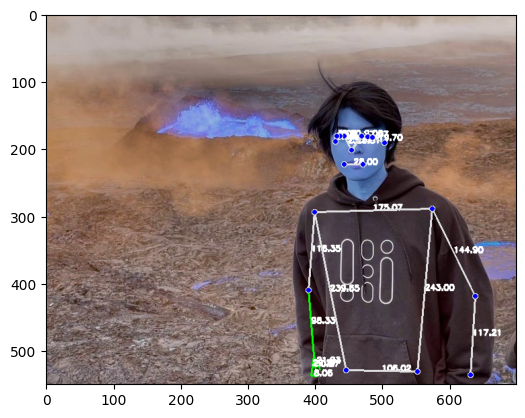

In [ ]:
plt.imshow(image_copy)

In [ ]:
import os
os.makedirs("landmarks/", exist_ok=True)

In [ ]:
## save image_copy under 'landmarks/photo_0.jpg'
cv2.imwrite("landmarks/photo_0.jpg", image_copy)
# plt.imshow(image_copy)

True

In [ ]:
depth_image = process_depth_estimation("photo_1.jpg")
image = cv2.imread("photo_1.jpg", cv2.COLOR_BGR2RGB)
results = process_pose(image)
image_copy = draw_landmark(image, depth_image, results, thick = 3, size = 0.8)

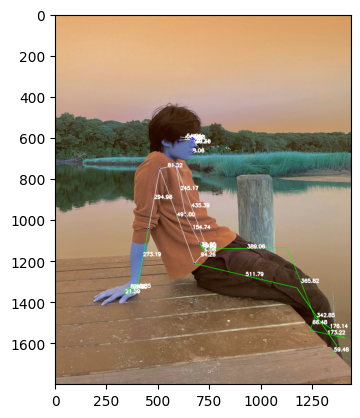

In [ ]:
plt.imshow(image_copy)

In [ ]:
cv2.imwrite("landmarks/photo_1.jpg", image_copy)

True

In [ ]:
depth_image = process_depth_estimation("photo_2.jpg")
image = cv2.imread("photo_2.jpg", cv2.COLOR_BGR2RGB)
results = process_pose(image)
image_copy = draw_landmark(image, depth_image, results, thick = 3, size = 0.8)

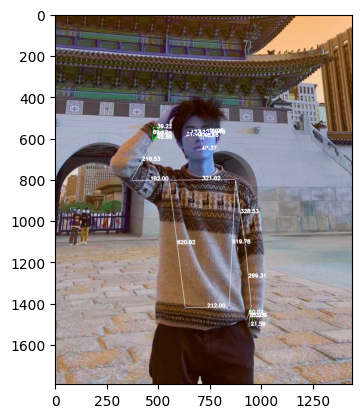

In [ ]:
plt.imshow(image_copy)

In [ ]:
cv2.imwrite("landmarks/photo_2.jpg", image_copy)

True

In [ ]:
depth_image = process_depth_estimation("photo_3.jpg")
image = cv2.imread("photo_3.jpg", cv2.COLOR_BGR2RGB)
results = process_pose(image)
image_copy = draw_landmark(image, depth_image, results, size = 0.8, thick = 3)

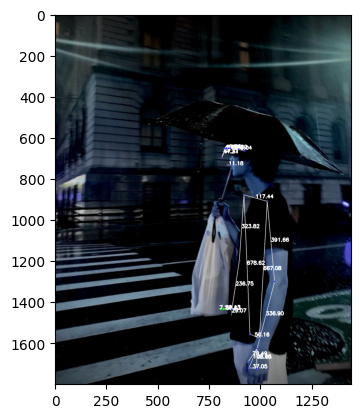

In [ ]:
plt.imshow(image_copy)

In [ ]:
cv2.imwrite("landmarks/photo_3.jpg", image_copy)

True

In [ ]:
depth_image = process_depth_estimation("photo_4.jpg")
image = cv2.imread("photo_4.jpg", cv2.COLOR_BGR2RGB)
results = process_pose(image)
image_copy = draw_landmark(image, depth_image, results, size = 0.8, thick = 3)

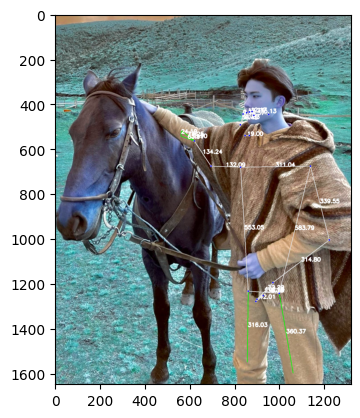

In [ ]:
plt.imshow(image_copy)

In [ ]:
cv2.imwrite("landmarks/photo_4.jpg", image_copy)

True

In [ ]:
def draw_and_store_landmark(image, depth_image, results, scale = 1, thick = 3, size = 1):
    landmarks = results.pose_landmarks
    connection_lengths = []
    image_copy = image.copy()
    ## scale the height and width by scale.
    h, w, c = image.shape
    image_copy = cv2.resize(image_copy, (int(w * scale), int(h * scale)))
    h, w, c = image.shape
    if landmarks is None:
        return
    for connection in mp_pose.POSE_CONNECTIONS:
        start_idx = connection[0]
        end_idx = connection[1]
        start_landmark = landmarks.landmark[start_idx]
        end_landmark = landmarks.landmark[end_idx]

        # Get pixel coordinates
        start_point = (int(start_landmark.x * w), int(start_landmark.y * h))
        end_point = (int(end_landmark.x * w), int(end_landmark.y * h))

        ## Check within bounds.
        if start_point[0] < 0 or start_point[0] >= w or start_point[1] < 0 or start_point[1] >= h:
            continue

        if end_point[0] < 0 or end_point[0] >= w or end_point[1] < 0 or end_point[1] >= h:
            continue

        ## Get d1 and d2.
        # d1 = depth_image[start_point[1]][start_point[0]]
        # d2 = depth_image[end_point[1]][end_point[0]]
        # d_min = min(d1, d2)

        # Calculate the Euclidean distance
        length = np.sqrt((end_point[1] - end_point[0]) ** 2 + (start_point[1] - start_point[0]) ** 2)

        # Scale length to the real-world distance if depth is known, else leave as a relative value
        # length *= 100  # Example scaling factor (adjust as needed)

        # Scale start and end point.
        start_point = (int(start_point[0] * scale), int(start_point[1] * scale))
        end_point = (int(end_point[0] * scale), int(end_point[1] * scale))

        ## Append connection length.
        connection_lengths.append((start_idx, end_idx, length))

        # Draw the connection
        cv2.line(image_copy, start_point, end_point, (0, 255, 0), 2)

        # Display the length
        mid_point = ((start_point[0] + end_point[0]) // 2, (start_point[1] + end_point[1]) // 2)
        cv2.putText(image_copy, f"{length:.2f}", mid_point, cv2.FONT_HERSHEY_SIMPLEX, size, (255, 255, 255), thick)

    mp_drawing = mp.solutions.drawing_utils
    mp_drawing.draw_landmarks(image_copy, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    return image_copy, landmarks, connection_lengths, depth_image

In [ ]:
def process_image(image_path, thick, size):
    depth_image = process_depth_estimation(image_path)
    image = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
    results = process_pose(image)
    image_copy, landmarks, connection_lengths, depth_image = draw_and_store_landmark(image, depth_image, results, size = size, thick = thick)
    return image_copy, landmarks, connection_lengths, depth_image

In [ ]:
import glob

images = glob.glob("photo*.jpg")
images

['photo_4.jpg', 'photo_2.jpg', 'photo_3.jpg', 'photo_0.jpg', 'photo_1.jpg']

In [ ]:
import os
os.makedirs("landmarks", exist_ok=True)

In [ ]:
os.makedirs("depth", exist_ok = True)

In [ ]:
for image in images:
    image_copy, landmarks, connection_lengths, depth_image = process_image(image, size = 0.8, thick = 3)
    ## save everything.
    ## cv2.imwrite("landmarks/" + image.split(".")[0] + ".jpg", image_copy) - there is a mistake, so commenting this out.
    ## np.save("landmarks/" + image.split(".")[0] + ".npy", np.array(connection_lengths)) - there is a mistake, so commenting this out.
    np.save("depth/" + image.split(".")[0] + ".npy", depth_image)
    cv2.imwrite("depth/" + image.split(".")[0] + ".jpg", depth_image)